In [4]:
%matplotlib inline
import numpy as np
import galaxy_analysis as ga
import matplotlib.pyplot as plt
import glob
import deepdish as dd

In [5]:
#
# Lets plot the mass loading factor for all gas as a function of time
# for all pre-computed data in a directory.
#

In [6]:
work = '/home/emerick/work/enzo_runs/leo_p_stampede/final_test/fullres/run11/200cc/'

all_output = glob.glob(work + '*.h5')
all_output = np.sort(all_output)

In [7]:
#
# load one of the files to figure out bin locations
#
data = dd.io.load(all_output[0])

z = data['gas_profiles']['outflow_rate']['zbins']
select_bin = 2

In [8]:
#
#
#
plot_data = {}
t = np.zeros(len(all_output))

fields = [('gas','H_total_mass'), ('gas','He_total_mass'), ('gas','metal_mass'), ('gas','O_Mass'), ('gas','Fe_Mass')]

for s in fields:
    plot_data[s] = np.zeros(len(all_output))

for i in np.arange(len(all_output)):
    t[i] = dd.io.load(all_output[i], '/meta_data/Time')
    x = dd.io.load(all_output[i], '/gas_profiles/outflow_rate')
    for s in fields:
        plot_data[s][i] = x[s][select_bin]
    

[]

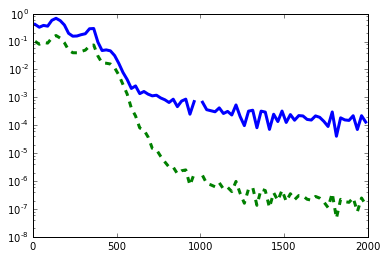

In [10]:
data = dd.io.load(all_output[20])


sd =  data['gas_profiles']['surface_density']
x = (sd['rbins'][1:] + sd['rbins'][:-1])*0.5


plt.plot(x, sd[('enzo','Density')], lw = 3, ls = '-')
plt.plot(x, sd[('enzo','HI_Density')], lw = 3, ls = '--')
plt.semilogy()

In [11]:
fig, ax = plt.subplots()

for s in fields:
    ax.plot(t, plot_data[s], label = s[1], lw = 3)

ax.set_xlabel('Time (Myr)')
ax.set_ylabel(r'Outflow Rate (M$_{\odot}$ yr$^{-1}$)')
ax.minorticks_on()
ax.semilogy()
fig.set_size_inches(8,8)
plt.tight_layout()

ValueError: Data has no positive values, and therefore can not be log-scaled.

/home/emerick/anaconda/lib/python2.7/site-packages/matplotlib/axis.py:1015: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/home/emerick/anaconda/lib/python2.7/site-packages/matplotlib/axis.py:1025: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


ValueError: posx and posy should be finite values

In [14]:
#
#
#
plot_data = {}
t = np.zeros(len(all_output))

fields = ['Disk', 'CNM', 'WNM', 'HIM', 'FullBox', 'stars', 'Molecular']

print (dd.io.load(all_output[-1],'/gas_meta_data/masses'))['CNM'].keys()


element = 'H'

for s in fields:
    plot_data[s] = np.zeros(len(all_output))

for i in np.arange(len(all_output)):
    t[i] = dd.io.load(all_output[i], '/meta_data/Time')
    x = dd.io.load(all_output[i], '/gas_meta_data/masses')
    for s in fields:
        plot_data[s][i] = x[s][element]
        #if not s == 'stars':
        #    plot_data[s][i] = x[s]['Total'] - x[s]['H'] - x[s]['He']
        #else:
            #plot_data[s][i] = 0.0

#print plot_data

['Ni', 'C', 'Ba', 'H', 'Ca', 'Mn', 'Si', 'Mg', 'O', 'N', 'Y', 'S', 'Fe', 'Eu', 'Total', 'He']


In [ ]:
fig, ax = plt.subplots()

for s in fields:
    ax.plot(t, plot_data[s] , lw = 3, label = s)

ax.set_xlabel('Time (Myr)')
ax.set_ylabel(element + ' Mass (Msun)')
fig.set_size_inches(8,8)
#ax.set_ylim(1.0E-8, 10)
plt.tight_layout()
ax.legend(loc='best')
ax.semilogy()